In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SPEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
data = pd.read_csv('creditcard.csv', sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
95157,65189,1.142364,-1.090177,0.511068,-0.792356,-1.160044,0.134166,-0.997184,0.236721,-0.583865,...,0.399798,0.815983,-0.172587,-0.298962,0.310993,-0.077793,0.011223,0.019004,106.00,0.0
95158,65190,-2.145283,1.280406,0.014577,-2.003358,1.479294,4.673049,-2.008023,-2.933663,0.036717,...,0.276433,-0.038006,0.085076,1.049870,0.489570,1.045371,-0.363337,-0.222526,34.61,0.0
95159,65190,-3.715715,3.870511,-1.525809,0.082535,-0.244009,-0.901579,0.708830,0.070491,2.349423,...,-0.327180,0.573451,0.266379,0.040564,-0.175983,-0.494220,0.257349,-0.309196,0.89,0.0
95160,65190,-5.164795,4.510526,-0.994499,-1.110853,-0.913228,-0.889076,0.373572,0.361552,3.841062,...,-0.908623,-1.154210,0.300341,-0.102776,0.817800,0.201861,2.384092,1.576142,7.18,0.0
95161,65191,-1.430966,1.192670,1.237388,1.074059,-0.997949,0.687186,-1.045570,1.012203,0.095426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95162 entries, 0 to 95161
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    95162 non-null  int64  
 1   V1      95162 non-null  float64
 2   V2      95162 non-null  float64
 3   V3      95162 non-null  float64
 4   V4      95162 non-null  float64
 5   V5      95162 non-null  float64
 6   V6      95162 non-null  float64
 7   V7      95162 non-null  float64
 8   V8      95162 non-null  float64
 9   V9      95162 non-null  float64
 10  V10     95162 non-null  float64
 11  V11     95162 non-null  float64
 12  V12     95162 non-null  float64
 13  V13     95161 non-null  float64
 14  V14     95161 non-null  float64
 15  V15     95161 non-null  float64
 16  V16     95161 non-null  float64
 17  V17     95161 non-null  float64
 18  V18     95161 non-null  float64
 19  V19     95161 non-null  float64
 20  V20     95161 non-null  float64
 21  V21     95161 non-null  float64
 22

# Exploratory Data Analysis

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

# Distribution of Normal Transactions & fraudulent transactions

In [6]:
data['Class'].value_counts()

0.0    94944
1.0      217
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

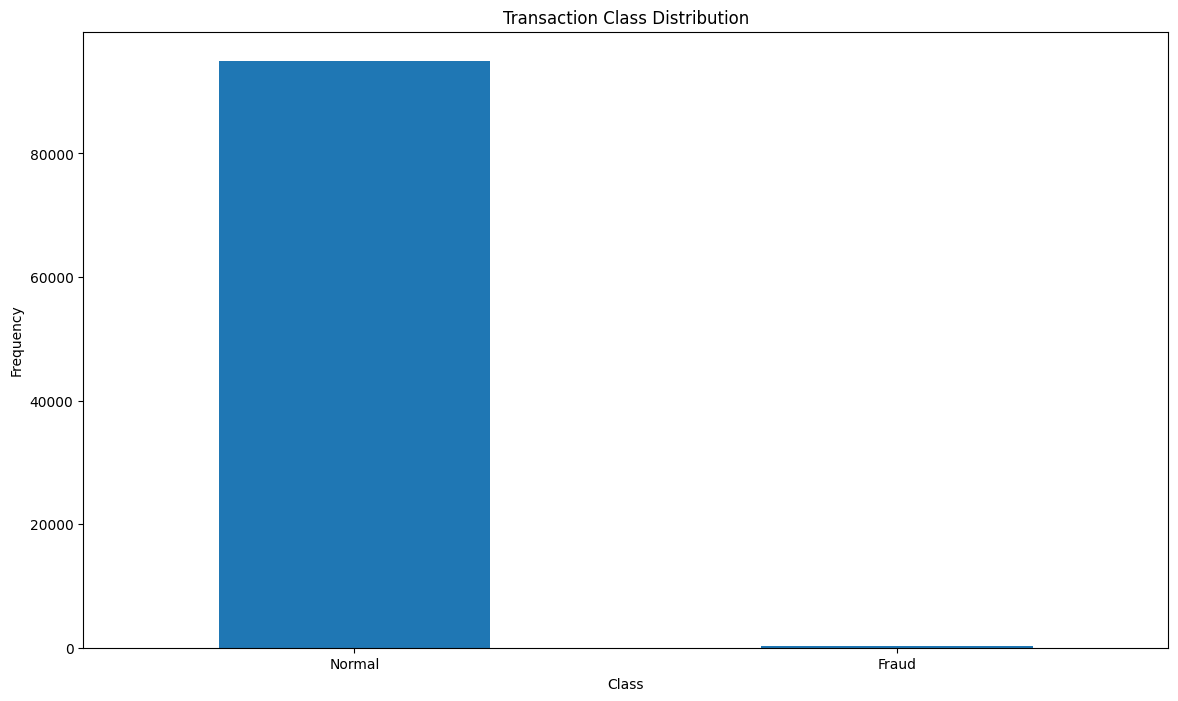

In [7]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

## Get the Fraud and the normal dataset

In [8]:
fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [9]:
print(fraud.shape,normal.shape)

(217, 31) (94944, 31)


## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?

In [10]:
fraud.Amount.describe()

count     217.000000
mean      109.784286
std       243.927116
min         0.000000
25%         1.000000
50%         7.580000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [11]:
normal.Amount.describe()

count    94944.000000
mean        98.685374
std        267.432993
min          0.000000
25%          7.600000
50%         26.720000
75%         89.752500
max      19656.530000
Name: Amount, dtype: float64

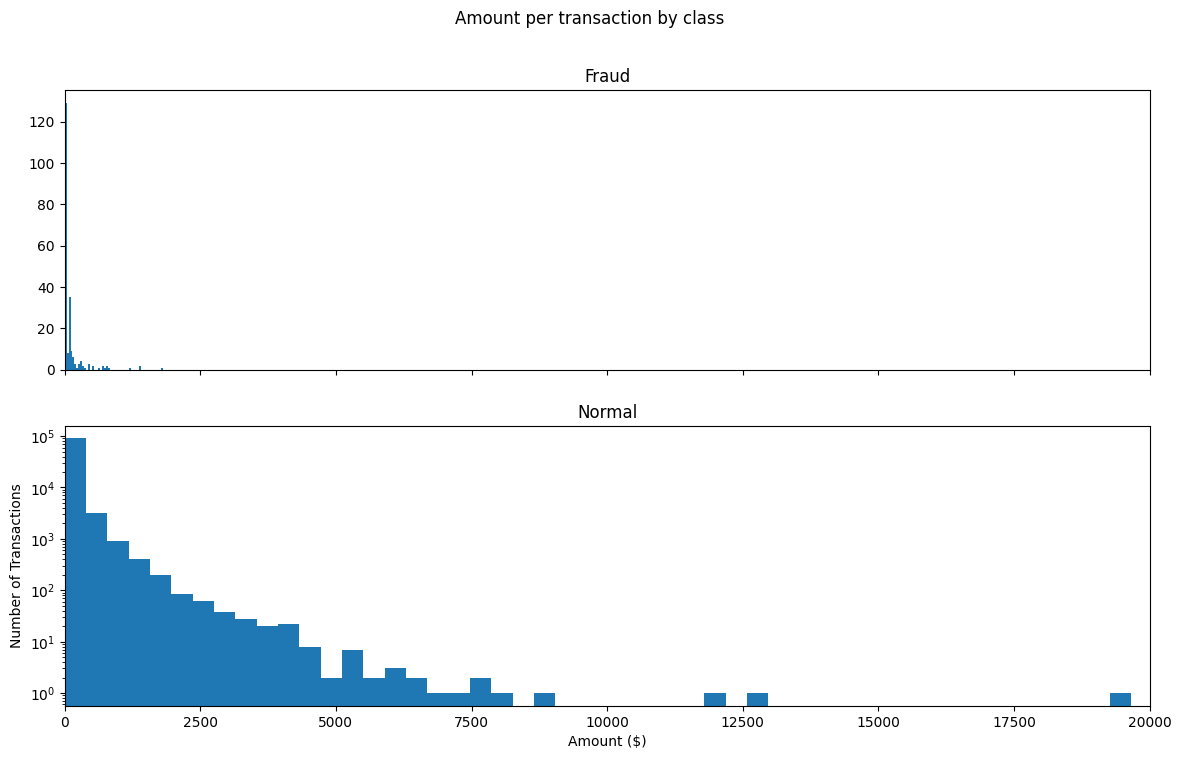

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.


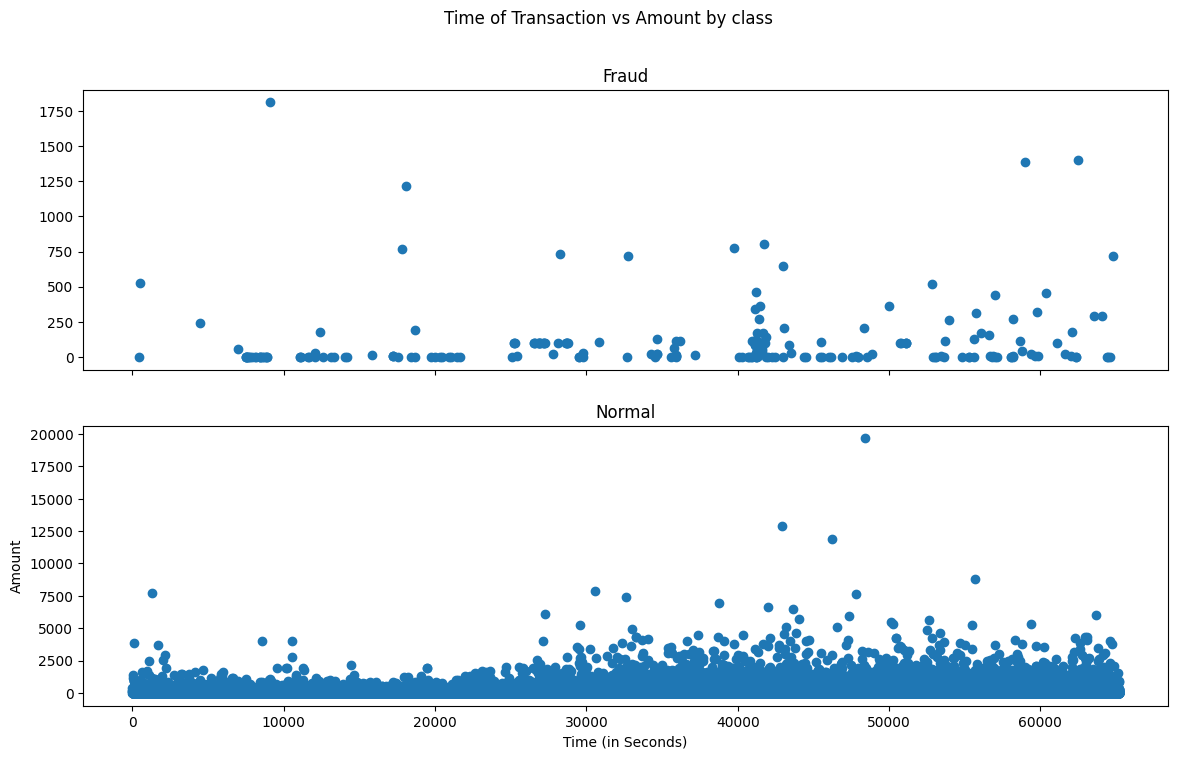

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of Transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Take some sample of the data

In [14]:
data1 = data.sample(frac = 0.1, random_state = 1)
data1.shape

(9516, 31)

In [15]:
data.shape

(95162, 31)

# Determine the number of fraud and valid transactions in the dataset


In [16]:
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [17]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0016842105263157896
Fraud Cases : 16
Valid Cases : 9500


## Correlation

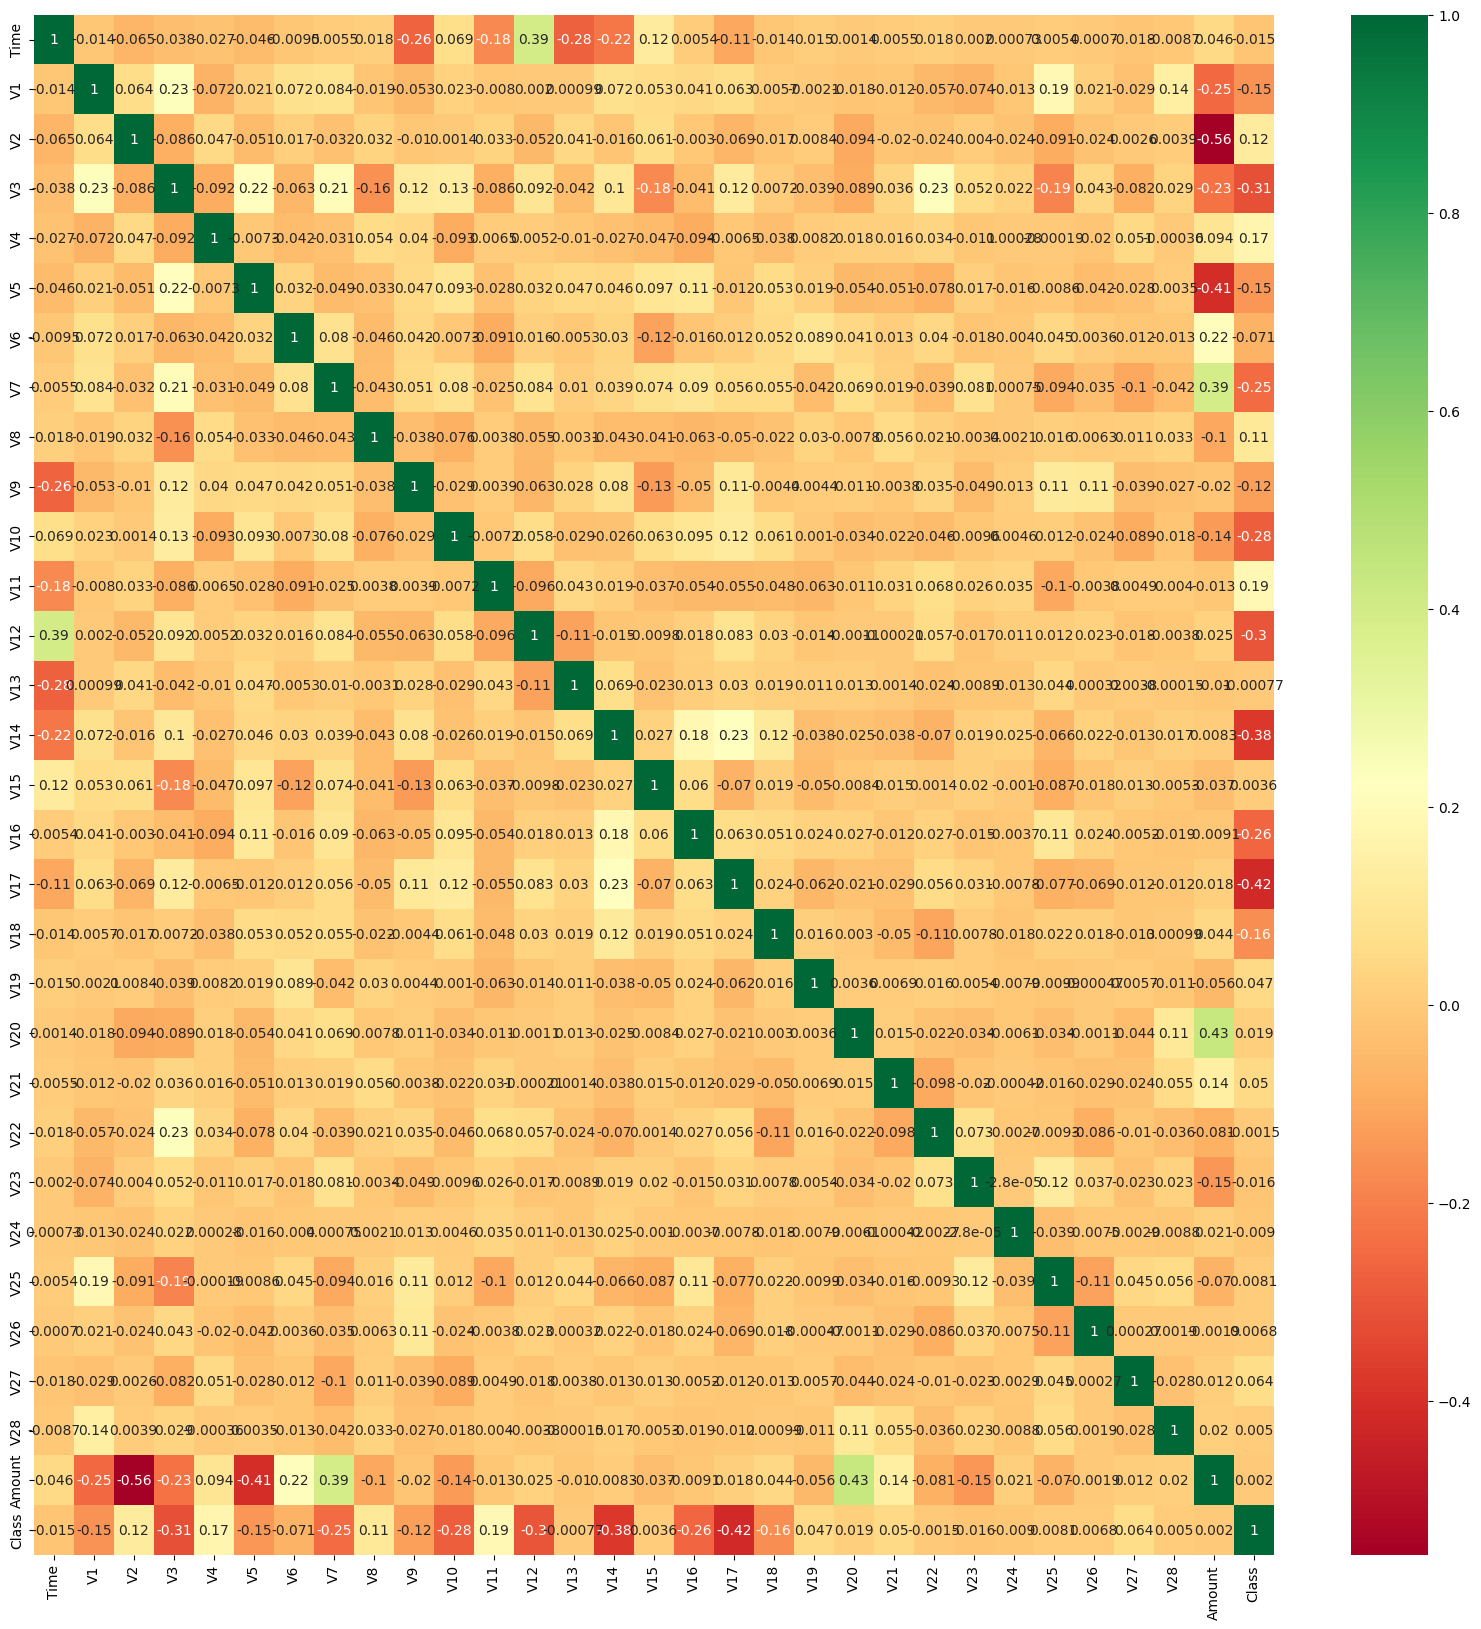

In [18]:
import seaborn as sns
#Get correlation of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#Plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [31]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(9516, 30)
(9516,)


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [33]:
x_scaler[-1]

array([-2.44643455,  0.91844229, -0.35121461, -0.76860305, -1.02093281,
        0.21076901,  0.47607417, -0.52554566,  0.10691673, -0.73739598,
        0.75877978, -0.18641995, -0.4499742 , -0.00513655, -0.0294108 ,
        0.27356268,  1.70152326, -0.41267997, -0.74755559,  1.38530902,
        0.05194359,  0.22085919,  0.52754111, -0.33219553, -2.83699364,
        1.10156597, -0.22767398,  0.02253548, -0.04764653, -0.27531892])

# **Split the data into Training data & Testing Data**

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(9516, 30) (7612, 30) (1904, 30)


# Model Training

## Logistic Regression

In [36]:
model = LogisticRegression()

In [38]:
import warnings
warnings.filterwarnings('ignore')
# Training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation
## Accuracy Score

In [39]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [40]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9982921702574882


In [41]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9973739495798319
